# Running T<sub>1</sub> Experiments with Qiskit

In a T<sub>1</sub> experiment, we measure an excited qubit after a delay. Due to decoherence processes (e.g. amplitude damping channel), it is possible that, at the time of measurement, after the delay, the qubit will not be excited anymore. The larger the delay time is, the more likely is the qubit to fall to the ground state. The goal of the experiment is to characterize the decay rate of the qubit towards the ground state.

We start by fixing a delay time $t$ and a number of shots $s$. Then, by repeating $s$ times the procedure of exciting the qubit, waiting, and measuring, we estimate the probability to measure $|1\rangle$ after the delay. We repeat this process for a set of delay times, resulting in a set of probabilities estimates.

In the absence of state preparation and measurement errors, the probablity to measure |1> after time $t$ is $e^{-t/T_1}$, for a constant $T_1$ (the coherence time), which is our target number. Since state preparation and measurement errors do exist, the qubit's decay towards the ground state assumes the form $Ae^{-t/T_1} + C$, for parameters $A, T_1$, and $C$, which we deduce form the probabilities estimates.

The following code demonstrates a basic run of a T<sub>1</sub> experiment for qubit 0.

{'value': 2.4109349433122695e-05,
 'stderr': 5.758362794402454e-07,
 'unit': 's',
 'label': 'T1',
 'fit': {'popt': array([9.87677873e-01, 2.41093494e-05, 1.58363936e-02]),
  'popt_keys': ['a', 'tau', 'c'],
  'popt_err': array([1.14708523e-02, 5.75836279e-07, 1.23325574e-02]),
  'pcov': array([[ 1.31580453e-04,  6.24127758e-09, -1.39616025e-04],
         [ 6.24127758e-09,  3.31587421e-13, -6.93812911e-09],
         [-1.39616025e-04, -6.93812911e-09,  1.52091973e-04]]),
  'reduced_chisq': 1.0568218880426588,
  'dof': 10,
  'xrange': [1e-06, 3.7e-05],
  'circuit_unit': 'us'},
 'quality': 'computer_good',
 'success': True}

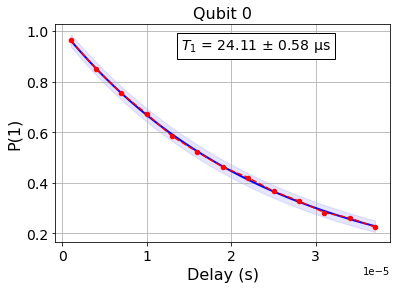

In [4]:
from qiskit_experiments.characterization import T1Experiment

# A T1 simulator
from qiskit_experiments.test.t1_backend import T1Backend

# Simulate T1 of 25 microseconds
t1 = 25
backend = T1Backend(t1=[t1*1e-6])

# Time intervals to wait before measurement
delays = list(range(1, 40, 3))

# Create an experiment for qubit 0,
# setting the unit to microseconds,
# with the specified time intervals
exp = T1Experiment(qubit=0, 
                   delays=delays,
                   unit="us")

# Run the experiment circuits with 10000 shots each,
# and analyze the result
res = exp.run(backend=backend,
              shots=10000,
              return_figures=True)

# Print the result
res.analysis_result(0)